In [4]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import tarfile
import urllib

#!pip install seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [5]:
#!pip install seaborn

https://medium.com/@dennisndungu68/text-classification-using-k-means-33bea24e4a94

https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python

https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a


In [6]:
df = pd.read_csv(r'master.csv')
df.head()

,index,title,year,wos,en,link,abstract,citations,clean_abstract,abstract_length
0,0,Financing Climate Change Adaptation: Internati...,2021.0,WOS:000666451800001,True,"<a href=""https://www.webofscience.com/wos/wosc...",Climate change adaptation is one of the main s...,27,one main strategy address global least develop...,64
1,1,Driving the agenda for climate change adaptati...,2013.0,WOS:000320956800008,True,"<a href=""https://www.webofscience.com/wos/wosc...",The absence of clear signals from the Norwegia...,55,absence clear signal norwegian state concernin...,62
2,2,Climate change adaptation policies and plans: ...,2018.0,WOS:000417078200110,True,"<a href=""https://www.webofscience.com/wos/wosc...",Building a climate-ready adaptation society is...,48,building ready society urgent question cannot ...,167
3,3,Place-based climate change adaptation: A criti...,2014.0,WOS:000345061100013,True,"<a href=""https://www.webofscience.com/wos/wosc...",Climate change adaptation frameworks often emp...,66,framework often emphasize tangible community v...,113
4,4,Responsibility for private sector adaptation t...,2014.0,WOS:000338711600014,True,"<a href=""https://www.webofscience.com/wos/wosc...",The Intergovernmental Panel on Climate Change ...,56,intergovernmental panel 2007 indicates vulnera...,168


In [7]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
#Bruke BERT vectorizer?
data = vectorizer.fit_transform(df["clean_abstract"]).toarray()

In [8]:
n_clusters = 5

preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)


In [9]:
pipe.fit(data)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [10]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)


0.9600019587810825

In [11]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans.fit(data)



KMeans(init='random', n_clusters=3, random_state=42)

In [12]:
# The lowest SSE value
print(kmeans.inertia_)


# Final locations of the centroid
print(kmeans.cluster_centers_)


# The number of iterations required to converge
print(kmeans.n_iter_)

label = kmeans.fit_predict(data)


11259.422698508883
[[ 5.07909345e-05  8.00469588e-04 -5.16690098e-20 ...  3.04931861e-20
   2.71050543e-20 -1.43995601e-19]
 [ 7.34682985e-04  9.80998848e-04  1.10114283e-20 ...  1.63780931e-04
   2.37169225e-20  1.69406589e-20]
 [ 5.29431477e-04  1.87208712e-03  1.93077216e-05 ... -2.71050543e-20
   2.27579662e-05  2.23508727e-05]]
31


In [16]:
# A list holds the SSE values for each k
run = True

if run:
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(k)



1
2
3
4
5
6
7
8
9
10


In [17]:
print(sse)

[11387.129677665245, 11320.161221822545, 11259.422698508883, 11214.46686613347, 11174.330736352538, 11143.920602161763, 11112.539214946843, 11085.482938720914, 11054.192836029872, 11034.45359936243]


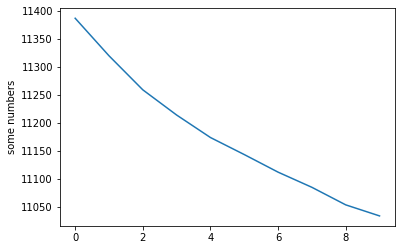

In [18]:
import matplotlib.pyplot as plt
plt.plot(sse)
plt.ylabel('some numbers')
plt.show()
